< Project 1. KIC MACH PROJECT >
============================

- 공모전 링크 : <https://dacon.io/competitions/official/235647/overview/>

# 1. Question or problem definition & Domain Research

## 1.1 Problem Definiton
### 1.1.1 Purpose
- 심리학 테스트 분석 알고리즘 개발
- 마키아벨리즘 심리테스트를 활용하여 테스트 참가자의 국가 선거 투표 여부 예측

## 1.2 Data
### 1.2.1 Dictionary

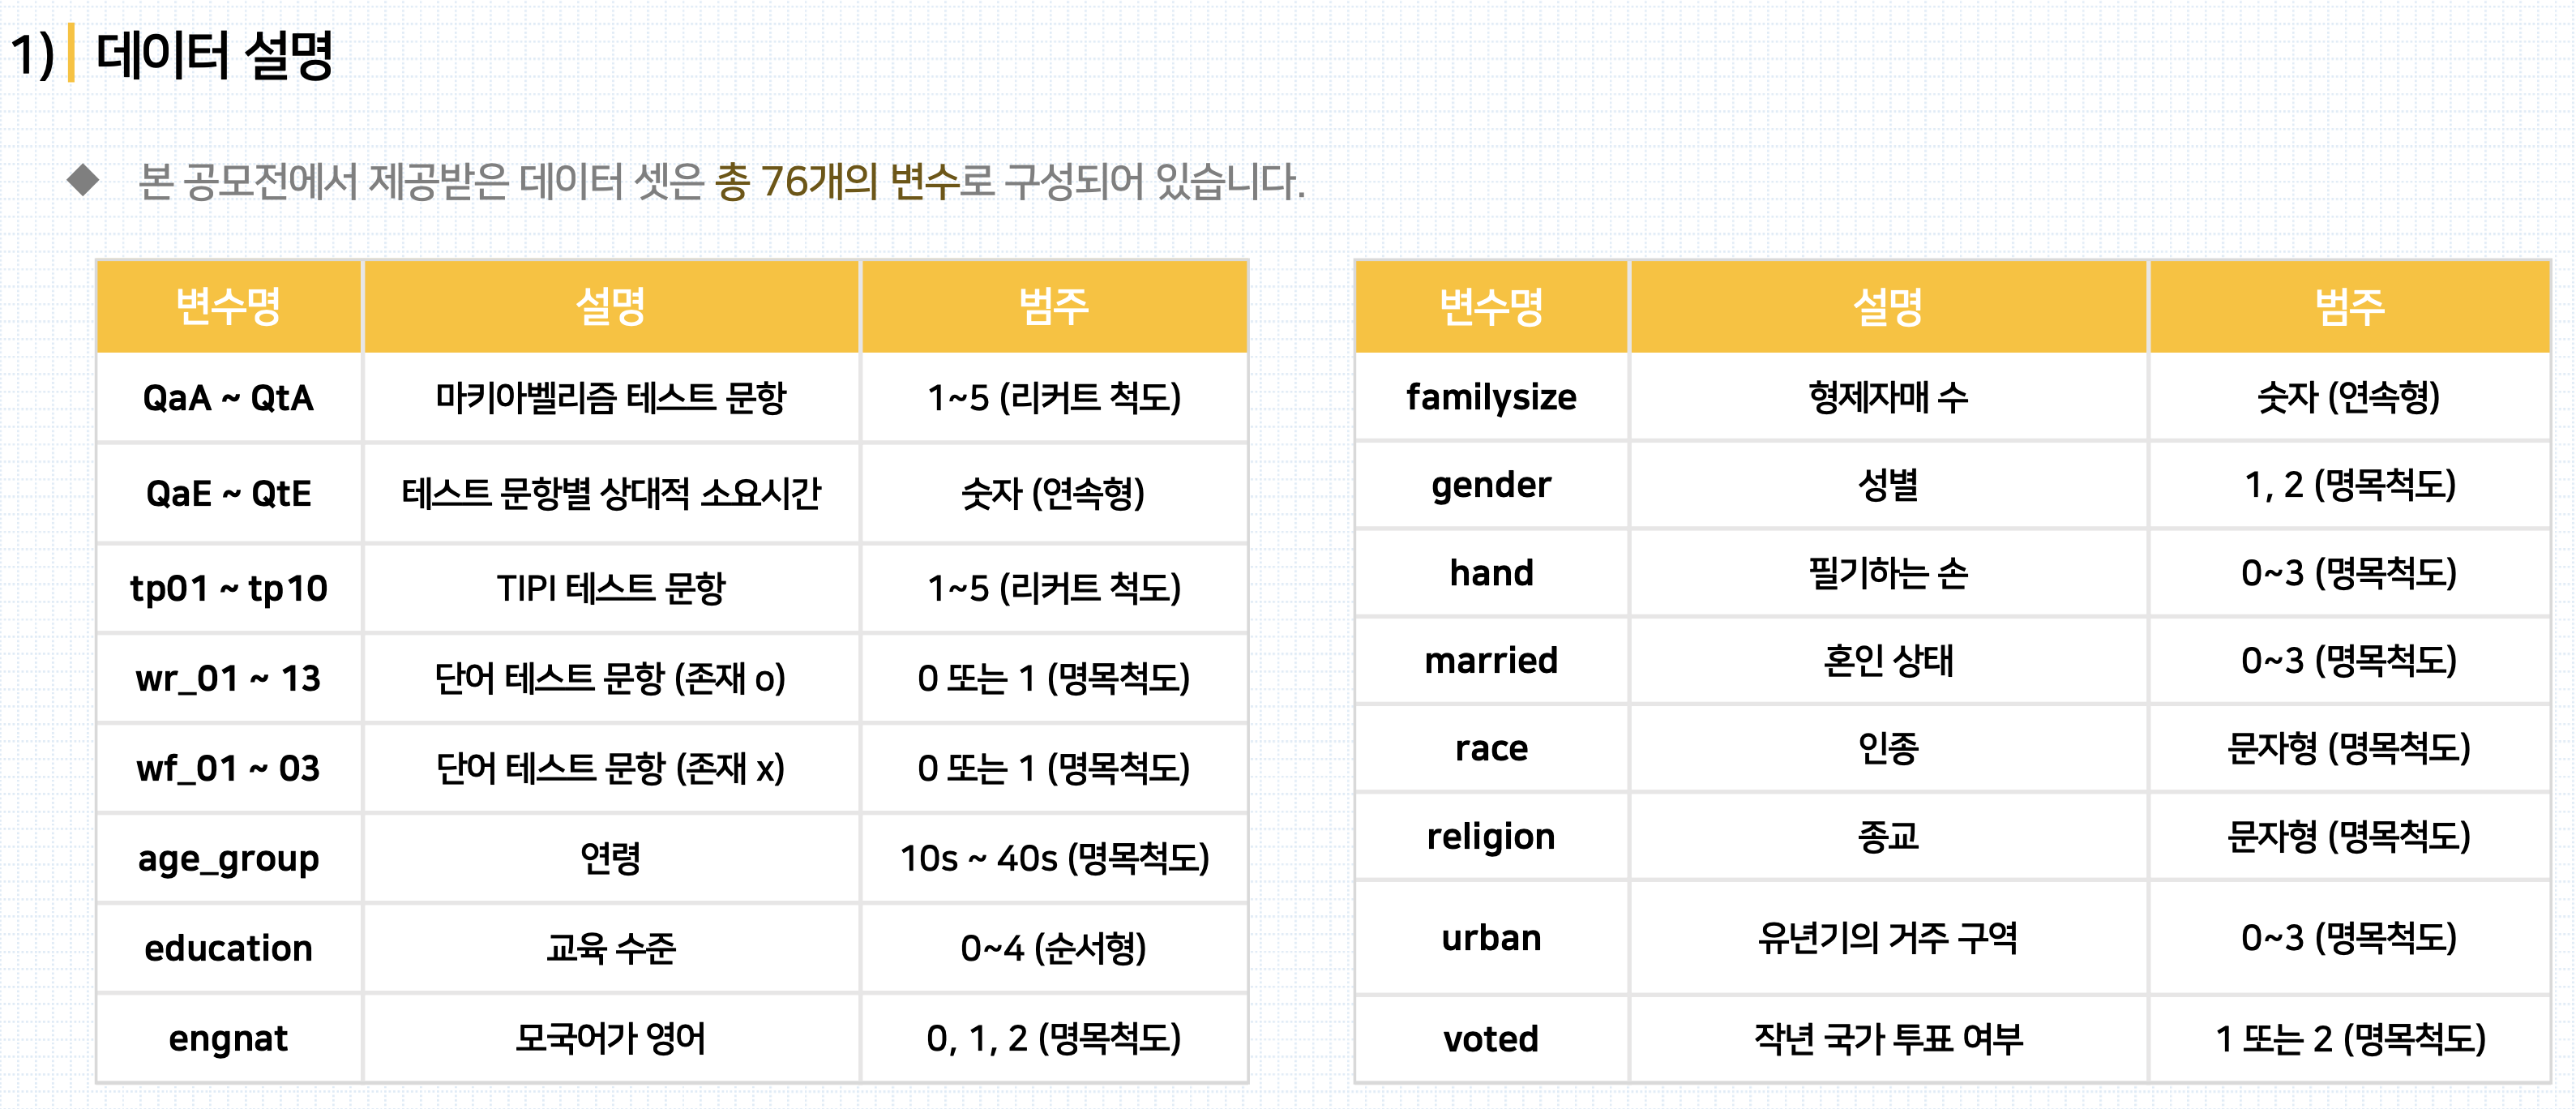

# 2. Acquire training and testig data : Data Loading

## 2.1 Package Loading

## 2.2 Data Loading

In [2]:
# Directory Set
import os
os.getcwd()
os.chdir('/Users/harryjeong/DA/DA_Project/KIC_Project')
os.getcwd()

'/Users/harryjeong/DA/DA_Project/KIC_Project'

In [3]:
import pandas as pd
train = pd.read_csv('Data/maki_train.csv')
test = pd.read_csv('Data/maki_test_x.csv')
combine = [train, test]
submission = pd.read_csv('Data/sample_submission.csv')

# 3. Data Analyze (EDA) & Preprocessing (Wrangle, Cleanse)

## 3.1 Analyze by describing data (Quick-view)

### 3.1.1 Check columns (name)

In [4]:
train.columns.values

array(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE',
       'QeA', 'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA',
       'QiE', 'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE',
       'QnA', 'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA',
       'QrE', 'QsA', 'QsE', 'QtA', 'QtE', 'age_group', 'education',
       'engnat', 'familysize', 'gender', 'hand', 'married', 'race',
       'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07',
       'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype=object)

### 3.1.2 Check feature type
1) Catagorical
- Categorical: engnat, gender, hand, married, race, race, religion, W_Ques, urban, education, voted
- Ordinal: Q_Ques, TP_Ques, age_group

2) Numerical
- Continous: Q_Time
- Discrete: familysize

In [5]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


### 3.1.3 Check errors or typos

In [6]:
train.tail()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1
45531,45531,3.0,496,5.0,1827,5.0,754,3.0,1117,1.0,432,4.0,1422,3.0,545,3.0,1696,4.0,2172,4.0,7076,5.0,1087,5.0,1090,4.0,2195,4.0,431,4.0,914,4.0,620,4.0,410,4.0,736,4.0,667,5.0,1665,20s,2,1,3,Male,1,1,White,Agnostic,3,2,1,2,3,0,2,3,1,2,2,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1


### 3.1.4 Check blank, null or empty values & data types
- integer or floats or strings (object)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       11383 non-null  int64  
 1   QaA         11383 non-null  float64
 2   QaE         11383 non-null  int64  
 3   QbA         11383 non-null  float64
 4   QbE         11383 non-null  int64  
 5   QcA         11383 non-null  float64
 6   QcE         11383 non-null  int64  
 7   QdA         11383 non-null  float64
 8   QdE         11383 non-null  int64  
 9   QeA         11383 non-null  float64
 10  QeE         11383 non-null  int64  
 11  QfA         11383 non-null  float64
 12  QfE         11383 non-null  int64  
 13  QgA         11383 non-null  float64
 14  QgE         11383 non-null  int64  
 15  QhA         11383 non-null  float64
 16  QhE         11383 non-null  int64  
 17  QiA         11383 non-null  float64
 18  QiE         11383 non-null  int64  
 19  QjA         11383 non-nul

### 3.1.5 Check distribution of numerical feature values
1) Q_Whole에서는 특별한 부분 안 보임
- Q_Time 분포 체크 -> 대부분 같은 범위에 있는 것으로 보이나 H, I가 다소 높은 수치 보여줌 (약 2배)

2) W_Ques
- wf 즉, 존재하지 않는 단어의 평균이 현저히 낮은 것으로 나옴 -> 존재하지 않는 단어라는 것을 대부분 안다는 의미
- wr_11, wr_06, wr_03, wr_09는 상대적으로 어려운 단어로 보임

### feature grouping based on its origin

In [9]:
# Q_Whole : Q 변수 전체
Q_Whole = ['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
		       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE',
		       'QjA', 'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA',
		       'QnE', 'QoA', 'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE',
		       'QsA', 'QsE', 'QtA', 'QtE']
# Q_Ques : Q 변수 중 질문만
Q_Ques = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
           'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
           'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
           'QpA', 'QqA', 'QrA', 'QsA', 'QtA']
# Q_Time : Q 변수 중 소요시간만
Q_Time = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QkE',
          'QjE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']

# W_Ques
W_Ques = ['wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
           'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']
wf_Ques = ['wf_01', 'wf_02', 'wf_03']
wr_Ques = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
           'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

# human : 인구통계학적 컬럼
human = ['education', 'engnat', 'familysize', 'hand', 'married', 'urban',
         'gender', 'age_group', 'race', 'religion']

In [10]:
train[Q_Ques].describe()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
count,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,2.904463,3.662347,1.749078,2.317952,2.168145,2.560595,2.317952,3.157691,3.575529,3.813933,4.325727,3.509620,2.632896,3.217232,3.071752,2.840464,2.823487,3.432948,3.225687
std,1.196952,1.566142,1.431494,1.043625,1.369205,1.348653,1.510600,1.460813,1.481740,1.361220,1.372551,1.146992,1.375134,1.473022,1.476414,1.489744,1.404342,1.424383,1.374938,1.521603
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,5.000000,4.000000,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,3.000000,4.000000,5.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
# Q_Time 분포 체크 -> 대부분 같은 범위에 있는 것으로 보이나 H, I가 다소 높은 수치 보여줌 (약 2배)
train[Q_Time].describe().T.drop(['max', 'std', 'count', 'min'], axis = 1)

,mean,25%,50%,75%
QaE,945.357046,404.0,557.0,827.0
QbE,2189.588575,875.0,1218.0,1838.0
QcE,1484.294518,651.0,899.0,1335.0
QdE,1490.672231,679.0,931.0,1355.0
QeE,1899.292278,834.0,1154.0,1656.0
QfE,1850.650268,504.0,712.0,1078.0
QgE,1284.607946,549.0,772.0,1150.0
QhE,4584.272138,1077.0,1464.0,2090.0
QiE,4068.433827,1259.0,1800.0,2761.0
QkE,2038.985790,859.0,1178.0,1721.0


In [12]:
# wf 즉, 존재하지 않는 단어의 평균이 현저히 낮은 것으로 나옴 -> 존재하지 않는 단어라는 것을 대부분 안다는 의미
# wr_11, wr_06, wr_03, wr_09는 상대적으로 어려운 단어로 보임
train[W_Ques].describe().loc['mean', :].sort_values(ascending = False)

wr_08    0.972195
wr_12    0.947729
wr_10    0.946104
wr_07    0.938900
wr_02    0.934793
wr_13    0.927040
wr_05    0.895722
wr_04    0.868708
wr_01    0.709721
wr_11    0.395195
wr_06    0.328538
wr_03    0.208974
wr_09    0.202824
wf_02    0.163665
wf_03    0.118356
wf_01    0.079592
Name: mean, dtype: float64

In [13]:
train[human].describe()

,education,engnat,familysize,hand,married,urban
count,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000
mean,2.544474,1.271326,4.716689e+04,1.170715,1.387112,2.180401
std,0.941328,0.448436,1.006402e+07,0.468883,0.639987,0.762647
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000e+00,1.000000,1.000000,2.000000
50%,3.000000,1.000000,2.000000e+00,1.000000,1.000000,2.000000
75%,3.000000,2.000000,3.000000e+00,1.000000,2.000000,3.000000
max,4.000000,2.000000,2.147484e+09,3.000000,3.000000,3.000000


## 3.2 Data Wrangling

- ### Creating mach_score
  - basically mach_score is sum of 20 questions.
  - However, in this data set, there are secret questions and some need to be reversed in order to make the total score.
  - Therefore, we decided to draw heatmap and see whether it shows the questions need to be reversed.

- Heatmap with original data
  - No secret questions show that they have clear correlations.
  ex) QbA & QcA (same direction) : positive correlations vs QbA  & QeA (opposite direction) : negative one

<AxesSubplot:>

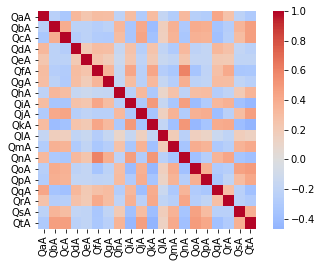

In [14]:
import seaborn as sns
correlations = train[Q_Ques].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

- Heatmap with reversing those known negative data
  - As you see on the heatmap below clearer correlations are seen.
  - And by that we can predict which questions are negative or positive.

In [15]:
for col in train[Q_Ques]:
    print(sorted(train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [16]:
# 음의 방향인 질문들을 한 방향으로 바꿔주기
for data in combine :
    flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
    for flip in flipping_columns: 
        data[flip] = 6 - data[flip]

<AxesSubplot:>

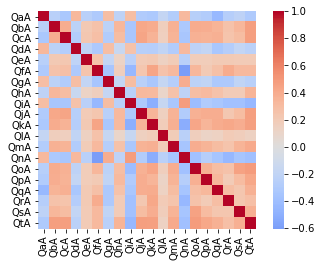

In [17]:
correlations = train[Q_Ques].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

- Heatmap with reversing those which unknown negative data.
  - finally, we found our data fully correlated to one direction.

In [18]:
for data in combine :
    flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
    for flip in flipping_secret_columns: 
        data[flip] = 6 - data[flip]

<AxesSubplot:>

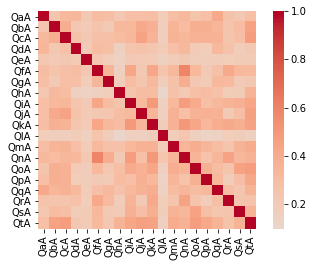

In [19]:
correlations = data[Q_Ques].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

- Creating mach_score column.

In [20]:
# 컬럼에 추가    
for data in combine :
    data['mach_score'] = data[Q_Ques].sum(axis = 1)
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,mach_score
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,59.0
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,52.0
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,38.0
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,67.0
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,60.0


In [21]:
data[['mach_score']].describe()

,mach_score
count,11383.000000
mean,67.199596
std,15.822510
min,20.000000
25%,55.000000
50%,68.000000
75%,80.000000
max,100.000000


- ### Creating tp_score
  - TP has its own way to create its total score and we did it.

In [22]:
# TP_score 계산 후 5개 성향으로 그룹화
# 원본 데이터 구성
# 0: 완전 동의 1:약간 동의 ...~ 5: 약간 비동의 6: 완전 비동의 , 7: 무응답 

# 7에서 빼주면 
# 7: 완전 동의 6: 약간 동의 ....~2:약간 비동의 1: 완전 비동의   0: 무응답   

for data in combine : 
    TP_Ques = ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']
    data.loc[:,TP_Ques] = data.loc[:,TP_Ques].applymap(lambda x: 7 - x)
    
    # 짝수 질문은 reverse가 필요함 
    # 무응답 은 그대로 두고  나머지 8에서 빼줌
    # 짝수질문만 
    # 1: 완전동의 2: 약간 동의 ... ~6: 약간 비동의 7: 완전 동의    0: 무응답    
    TP_sel = ['tp02','tp04','tp06','tp08','tp10']
    data.loc[:,TP_sel] = data.loc[:,TP_sel].applymap(lambda x: 0 if x == 0 else 8 - x)

    # TIPI 계산
    data['sung']  = (data.tp03 + data.tp08)/2
    data['chin']= (data.tp07 + data.tp02)/2
    data['jung'] = (data.tp09 + data.tp04)/2
    data['kyung'] = (data.tp05 + data.tp10)/2
    data['why'] =(data.tp01 + data.tp06)/2
tp_score = ['sung', 'chin', 'jung', 'kyung', 'why']

## 3.3 Analyze by pivoting features
### Dependant variable vs each Explanatory variable
- To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other.
- We can only do so at this stage for features which do not have any empty values.
It also makes sense doing so only for features which are categorical (human), ordinal (Q_Ques, TP_Ques, age_group) or discrete (familysize) type.

### Summary
- The voted rate is 0.45. (24898 voted, 20634 not voted out of 45532).
- education, age_group, married are strongly related to the voted rate. (classifying)
- engnat, gender, hand, race, religion, urban, familysize are not clearly related to the voted rate. (completing for familysize, creating)

In [23]:
# voted : 1, not voted : 2
a1 = sum(train['voted'] == 1) / len(train['voted'])
a2 = sum(train['voted'] == 1)
a3 = sum(train['voted'] == 2)
a4 = len(train['voted'])

print('The voted rate is %.2f. (%d voted, %d not voted out of %d)' \
% (a1, a2, a3, a4))

The voted rate is 0.45. (20634 voted, 24898 not voted out of 45532)


In [24]:
# By using 'mean' we can see the rate of voted and not voted.
# People with Higher education voted more. **
train[['education', 'voted']].groupby(['education'], as_index = False).mean().sort_values(by = 'voted')

,education,voted
4,4,1.380316
3,3,1.403494
0,0,1.522727
2,2,1.632967
1,1,1.950275


In [25]:
# not clear clue
train[['engnat', 'voted']].groupby(['engnat'], as_index = False).mean().sort_values(by = 'voted')

,engnat,voted
1,1,1.537397
2,2,1.571394
0,0,1.623377


In [26]:
# not clear clue
train[['gender', 'voted']].groupby(['gender'], as_index = False).mean().sort_values(by = 'voted')

,gender,voted
0,Female,1.539573
1,Male,1.553206


In [27]:
# The older, the more voted. **
train[['age_group', 'voted']].groupby(['age_group'], as_index = False).mean().sort_values(by = 'voted')

,age_group,voted
0,+70s,1.263830
6,60s,1.271357
5,50s,1.329872
4,40s,1.357949
3,30s,1.411179
2,20s,1.469671
1,10s,1.837214


In [28]:
# not clear clue
train[['hand', 'voted']].groupby(['hand'], as_index = False).mean().sort_values(by = 'voted')

,hand,voted
2,2,1.540494
1,1,1.545317
3,3,1.592844
0,0,1.633540


In [29]:
# People with currently married(2) & previously married(3) are more likely to have voted. **
train[['married', 'voted']].groupby(['married'], as_index = False).mean().sort_values(by = 'voted')

,married,voted
2,2,1.333433
3,3,1.422454
1,1,1.629572
0,0,1.677419


In [30]:
# White people are more likely to have voted, but not clearly related.
train[['race', 'voted']].groupby(['race'], as_index = False).mean().sort_values(by = 'voted')

,race,voted
6,White,1.495776
3,Indigenous Australian,1.547170
4,Native American,1.587591
2,Black,1.597786
5,Other,1.622402
1,Asian,1.704565
0,Arab,1.709402


In [31]:
# not clear clue
train[['religion', 'voted']].groupby(['religion'], as_index = False).mean().sort_values(by = 'voted')

,religion,voted
6,Christian_Protestant,1.434667
8,Jewish,1.449692
3,Christian_Catholic,1.526512
5,Christian_Other,1.539615
0,Agnostic,1.542602
1,Atheist,1.572704
10,Other,1.582809
7,Hindu,1.613016
4,Christian_Mormon,1.619159
2,Buddhist,1.621176


In [32]:
# not clear clue
train[['urban', 'voted']].groupby(['urban'], as_index = False).mean().sort_values(by = 'voted')

,urban,voted
0,0,1.490683
1,1,1.492872
2,2,1.541545
3,3,1.580402


In [33]:
# not clear clue
# found NA
train[['familysize', 'voted']].groupby(['familysize'], as_index = False).mean().sort_values(by = 'voted')

,familysize,voted
17,17,1.000000
24,100,1.000000
25,999,1.000000
21,30,1.000000
13,13,1.363636
15,15,1.375000
11,11,1.435897
14,14,1.444444
12,12,1.476190
7,7,1.480620


## 3.4 Analyze by visualizing data in 5 ways
>Confirming some of our assumptions using visualizations for analyzing the data.

### 3.4.0 Heatmap
>Check correlation btw human features
- (+) Relation : education & married, voted & married, voted & education
- (-) Relation : mach_score & married, mach_score & chin

<AxesSubplot:>

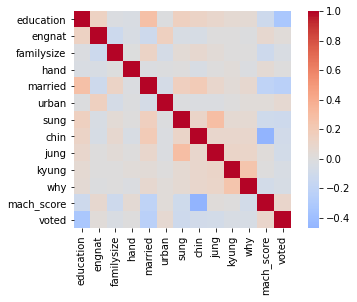

In [34]:
# (+) Relation : education & married, voted & married, voted & education, 
# (-) Relation : mach_score & married, mach_score & chin
import seaborn as sns
corr_fea = human + tp_score + ['mach_score'] + ['voted']
corr = train[corr_fea].corr(method = 'spearman')
sns.heatmap(corr, cmap = 'coolwarm', square = True, center = 0)

### 3.4.1 Correlating based on feature types
- mach_score
   - 56점 이상 높아지면 점점 not voted가 많아짐 => classifying
- tp_score : 큰 의미 없어보임
- age_group + mach_score
   - 10s are the most, but most did not vote and they tend to have high mach_score
   - 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
   - It seems high mach_score provoke low vote rate and the low is opposite.
- Married might divide into two groups at [0.0, 1.0], [2.0, )
- Education must be an important feature and is already well-grouped.

- ### mach & voted

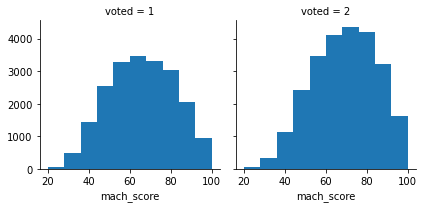

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(train, col = 'voted')
g.map(plt.hist, 'mach_score')

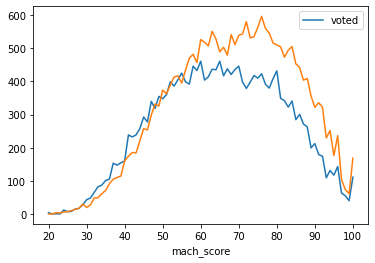

In [36]:
# mach_score가 50점 이상 높아지면 점점 not voted가 많아짐 => classifying
train[['mach_score', 'voted']][train['voted'] == 1].groupby('mach_score').count().plot()
plt.plot(train[['mach_score', 'voted']][train['voted'] == 2].groupby('mach_score').count())

In [37]:
# mach_score 56점 기준으로 not voted가 voted보다 많아지며 그 추세는 계속됨
# 그러나 변동폭이 있어서 그 차이가 일정하게 늘어나는 것은 아니라 classifying하기 쉽지 않음
v1 = train[['mach_score', 'voted']][train['voted'] == 2].groupby('mach_score').count() - train[['mach_score', 'voted']][train['voted'] == 1].groupby('mach_score').count()
v1[v1.voted > 0].T

mach_score,22.0,23.0,26.0,29.0,48.0,50.0,51.0,53.0,54.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
voted,3,3,2,2,13,26,3,27,12,35,78,36,24,65,114,93,114,93,28,86,41,120,75,93,145,201,133,117,153,173,168,166,108,78,155,131,171,164,168,141,132,146,156,109,156,148,120,120,59,93,41,19,21,57


- ### tp_score & voted

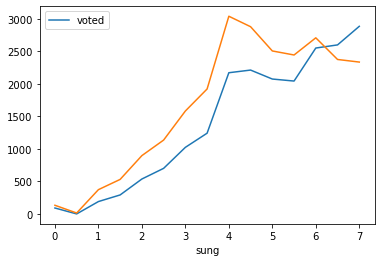

In [38]:
# 개별 : 점수가 높을수록 투표율/비투표율 높아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['sung', 'voted']][train['voted'] == 1].groupby('sung').count().plot()
plt.plot(train[['sung', 'voted']][train['voted'] == 2].groupby('sung').count())

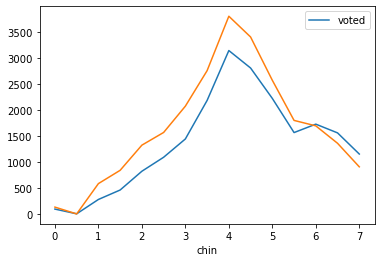

In [39]:
# 개별 : 4점까지 투표율/비투표율 높아지고 그 이후로 낮아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['chin', 'voted']][train['voted'] == 1].groupby('chin').count().plot()
plt.plot(train[['chin', 'voted']][train['voted'] == 2].groupby('chin').count())

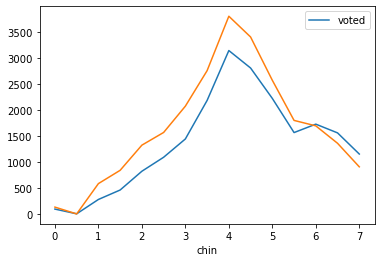

In [40]:
# 개별 : 4점까지 투표율/비투표율 높아지고 그 이후로 낮아짐 -> 변별력 없음
# 비교 : 대략 6점 이상부터 투표한 사람이 안 한사람보다 더 많아짐 -> 변별력 없음
train[['chin', 'voted']][train['voted'] == 1].groupby('chin').count().plot()
plt.plot(train[['chin', 'voted']][train['voted'] == 2].groupby('chin').count())

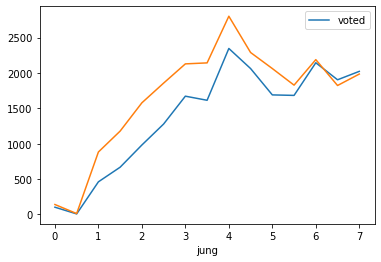

In [41]:
# 변별력 없음
train[['jung', 'voted']][train['voted'] == 1].groupby('jung').count().plot()
plt.plot(train[['jung', 'voted']][train['voted'] == 2].groupby('jung').count())

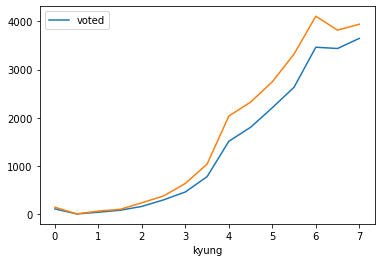

In [42]:
# 변별력 없음
train[['kyung', 'voted']][train['voted'] == 1].groupby('kyung').count().plot()
plt.plot(train[['kyung', 'voted']][train['voted'] == 2].groupby('kyung').count())

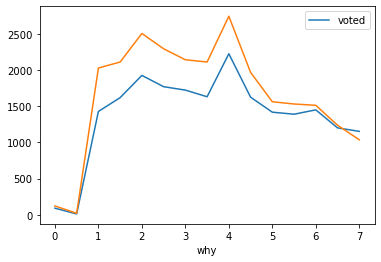

In [43]:
# 변별력 없음
train[['why', 'voted']][train['voted'] == 1].groupby('why').count().plot()
plt.plot(train[['why', 'voted']][train['voted'] == 2].groupby('why').count())

- ### age_group & mach & voted

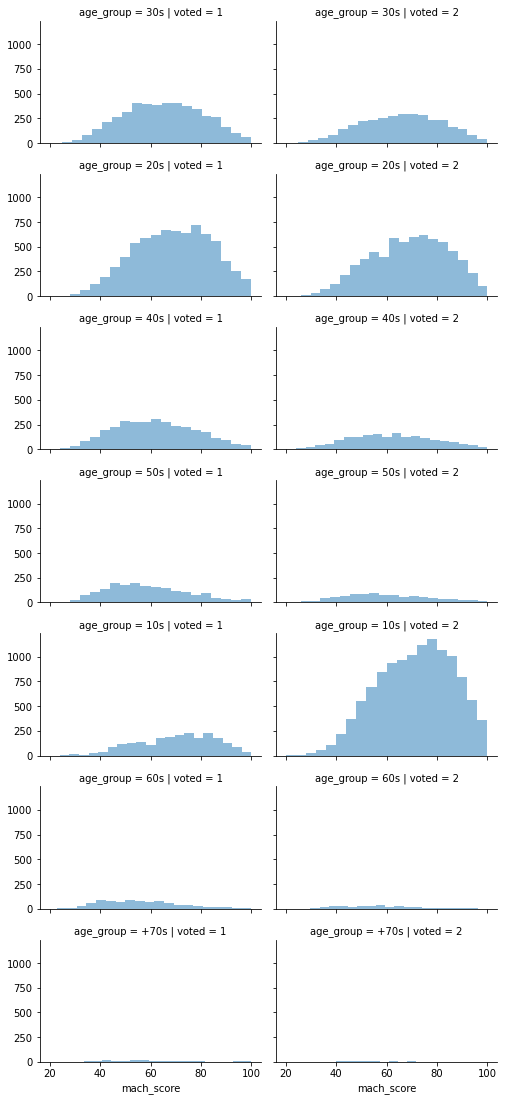

In [44]:
# 10s are the most, but most did not vote and they tend to have high mach_score
# 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
# It seems high mach_score provoke low vote rate and the low is opposite.
grid = sns.FacetGrid(train, col = 'voted', row = 'age_group', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'mach_score', alpha = .5, bins = 20)
grid.add_legend()

- ### education & voted

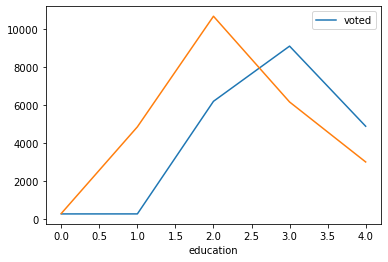

In [45]:
# Education is already well-grouped.
train[['education', 'voted']][train['voted'] == 1].groupby('education').count().plot()
plt.plot(train[['education', 'voted']][train['voted'] == 2].groupby('education').count())

- ### married & voted

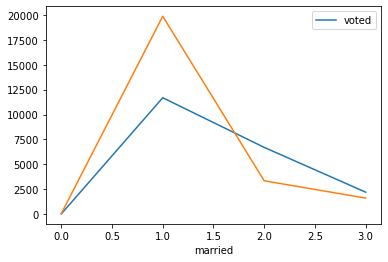

In [46]:
# Married might divide into two groups at [0.0, 1.0], [2.0, )
train[['married', 'voted']][train['voted'] == 1].groupby('married').count().plot()
plt.plot(train[['married', 'voted']][train['voted'] == 2].groupby('married').count())

## 3.5 Wrangle data
>We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### 3.5.1 Correcting by dropping features
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.
- Based on our assumptions and decisions we want to drop **'Q_Time, W_Ques, tp_score, mach_score'**  features.
- Based on our assumptions and decisions we also want to drop **''**  features.

In [47]:
train = train.drop(Q_Time, axis = 1).drop(W_Ques, axis = 1).drop(tp_score, axis = 1).drop('mach_score', axis = 1)
test = test.drop(Q_Time, axis = 1).drop(W_Ques, axis = 1).drop(tp_score, axis = 1).drop('mach_score', axis = 1)

### 3.5.2 Creating new feature extracting from existing
- age, mach, married may be considered to create new feature by banding.

- mach_score
   - 56점 이상 높아지면 점점 not voted가 많아짐 => classifying
- tp_score : 큰 의미 없어보임
- age_group + mach_score
   - 10s are the most, but most did not vote and they tend to have high mach_score
   - 40s, 50s, 60s mostly voted and they tend to have relatively low mach_score
   - It seems high mach_score provoke low vote rate and the low is opposite.
- Married might divide into two groups at [0.0, 1.0], [2.0, )
- Education must be an important feature and is already well-grouped.

### 3.5.3 Completing a numerical continuous feature (NA)
Now we should start estimating and completing features with missing or null values.   
ex) - familysize seems it has outlier -> but we already eliminated.
   
We can consider three methods to complete a numerical continuous feature.   
1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).
2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

### 3.5.4 Completing a categorical feature (NA)
- There is no NA.

### 3.5.5 Create new feature combining existing features
- PCA : we used PCA to make artifical variables during modeling.

### 3.5.6 Converting categorical feature to numeric

In [48]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
combine = [train, test]
for data in combine :
    data['gender_code'] = label.fit_transform(data['gender'])
    data['age_group_code'] = label.fit_transform(data['age_group'])
    data['race_code'] = label.fit_transform(data['race'])
    data['religion_code'] = label.fit_transform(data['religion'])

train, test = combine[0], combine[1]
# 라벨링한 변수들의 이전 형태는 제거
drop = ['gender','age_group','race','religion']
train = train.drop(drop, axis = 1)
test = test.drop(drop, axis = 1)

In [49]:
train.columns

Index(['index', 'QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA',
       'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA',
       'QtA', 'education', 'engnat', 'familysize', 'hand', 'married', 'tp01',
       'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10',
       'urban', 'voted', 'gender_code', 'age_group_code', 'race_code',
       'religion_code'],
      dtype='object')

# 4. Modeling, Predict and Solve the problem

## 4.1 Listing possible models
- Randome Forest

## 4.2 Modeling by split train data
- data setting (scaling, split)

In [50]:
Y_train = train['voted']
X_train = train.drop('voted', axis = 1)

In [51]:
# 스케일링 
from sklearn.preprocessing import StandardScaler as standard
m_sc = standard()
m_sc.fit(X_train)
X_train_sc = m_sc.transform(X_train)
test_sc = m_sc.transform(test)

# 데이터프레임으로 변경
from pandas import DataFrame
X_train_sc = DataFrame(X_train_sc, columns = X_train.columns.tolist()).iloc[:, 1:]
test_sc = DataFrame(test_sc, columns = test.columns.tolist()).iloc[:, 1:]

In [52]:
X_train_sc.columns

Index(['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
       'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA',
       'education', 'engnat', 'familysize', 'hand', 'married', 'tp01', 'tp02',
       'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'gender_code', 'age_group_code', 'race_code', 'religion_code'],
      dtype='object')

In [53]:
# Q_Ques 선택한 변수 세팅
qdf1 = X_train_sc.loc[:,Q_Ques]
qdf2 = test_sc.loc[:,Q_Ques]

# 추후 합해야 하므로 Q_Ques 제거한 변수 세팅
X_train_sc = X_train_sc.drop(Q_Ques,axis = 1)
test_sc = test_sc.drop(Q_Ques,axis = 1)

In [54]:
# PCA
import numpy as np
vscore_te = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99] :
    from sklearn.decomposition import PCA
    m_pca = PCA(n_components = i)            # n_components : 인공변수 갯수 
    m_pca.fit(qdf1)                       # y의 fitting 필요 없음 
    
    train_x_pca = m_pca.transform(qdf1)
    test_x_pca = m_pca.transform(qdf2)
    
    s1_columns = np.arange(1, len(train_x_pca[1]) + 1)
    train_x_pca = DataFrame(train_x_pca, columns = s1_columns)
    test_x_pca = DataFrame(test_x_pca, columns = s1_columns)
    
    c1 = train_x_pca.columns.tolist()
    c2 = X_train_sc.columns.tolist()
    c3 = c1 + c2
    
    train_new = DataFrame(np.hstack([train_x_pca, X_train_sc]), columns = c3)
    test_new = DataFrame(np.hstack([test_x_pca, test_sc]), columns = c3)
    
    # train_test_split 
    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y = train_test_split(train_new, Y_train, random_state= 0)
    
    # RF
    from sklearn.ensemble import RandomForestClassifier as rf_c
    m_rf = rf_c(random_state = 0)
    m_rf.fit(train_x, train_y)
    
    # test 데이터로 체크
    vscore_te.append(m_rf.score(test_x, test_y))    # best score = 0.6977949 (0.7)

### 4.2.1 Random Forest

In [55]:
# resut listing
vscore_te

[0.6930510410260915,
 0.6930510410260915,
 0.6930510410260915,
 0.6963893525432663,
 0.6980585083018537,
 0.6983220592111042,
 0.6909426337520864,
 0.6932267416322586,
 0.695862250724765,
 0.6915575858736712,
 0.6926996398137574,
 0.6963015022401827,
 0.699551963454274,
 0.6921725379952561]

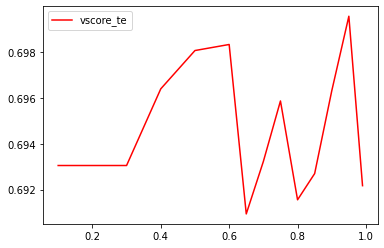

In [56]:
# visualizing
import matplotlib.pyplot as plt
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99],
         vscore_te, label = 'vscore_te', color = 'red')
plt.legend()

In [57]:
# PCA 인공변수 개수 고정(0.7) 및 RF 매개변수 튜닝
from pandas import Series
from sklearn.decomposition import PCA
m_pca = PCA(n_components = 0.95)            # n_components : 인공변수 갯수 
m_pca.fit(qdf1)                       # y의 fitting 필요 없음 
    
train_x_pca = m_pca.transform(qdf1)
test_x_pca = m_pca.transform(qdf2)
    
s1_columns = np.arange(1, len(train_x_pca[1]) + 1)
train_x_pca = DataFrame(train_x_pca, columns = s1_columns)
test_x_pca = DataFrame(test_x_pca, columns = s1_columns)
    
c1 = train_x_pca.columns.tolist()
c2 = X_train_sc.columns.tolist()
c3 = c1 + c2
    
train_new = DataFrame(np.hstack([train_x_pca, X_train_sc]), columns = c3)
test_new = DataFrame(np.hstack([test_x_pca, test_sc]), columns = c3)

# train_test_split 
train_x, test_x, train_y, test_y = train_test_split(train_new, Y_train, random_state= 0)
    
v_score_te = [] ; v_score_tr = []
for i in range(50, 200) :
    m_rf = rf_c(random_state = 0, n_estimators = i)
    m_rf.fit(train_x, train_y)
    v_score_tr.append(m_rf.score(train_x, train_y))
    v_score_te.append(m_rf.score(test_x, test_y))
    
Series(v_score_te).sort_values(ascending = False)    # i = 100일때 best score    

63     0.701573
61     0.701045
65     0.700870
82     0.700694
55     0.700694
80     0.700606
42     0.700518
70     0.700430
64     0.700430
83     0.700343
57     0.700255
74     0.700255
78     0.700167
88     0.700167
54     0.700167
43     0.700079
107    0.700079
46     0.699991
66     0.699991
44     0.699991
90     0.699991
69     0.699991
62     0.699991
73     0.699991
86     0.699991
77     0.699903
85     0.699903
130    0.699903
75     0.699816
40     0.699816
41     0.699816
59     0.699816
106    0.699728
67     0.699640
128    0.699640
53     0.699640
76     0.699640
89     0.699552
48     0.699552
50     0.699552
51     0.699552
84     0.699552
45     0.699552
71     0.699464
81     0.699376
114    0.699376
47     0.699376
72     0.699288
94     0.699288
52     0.699288
79     0.699288
56     0.699201
91     0.699113
96     0.699113
97     0.699113
92     0.699025
118    0.699025
100    0.699025
87     0.699025
38     0.698937
115    0.698937
58     0.698937
131    0

In [58]:
max(v_score_te)

0.7015725204251955

In [59]:
# number of PCA : 18
c1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

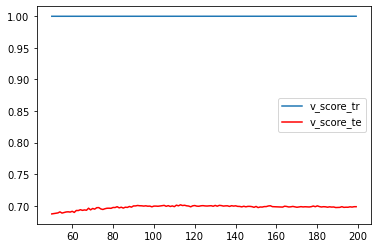

In [60]:
import matplotlib.pyplot as plt
plt.plot(np.arange(50, 200), v_score_tr, label = 'v_score_tr')
plt.plot(np.arange(50, 200), v_score_te, label = 'v_score_te', color = 'red')
plt.legend()    

## 4.3 Modeling by full data

### 4.3.1 Random Forest

- fitting on whole data : 0.6902088692

In [62]:
from sklearn.ensemble import RandomForestClassifier as rf_c
m_rf = rf_c(random_state = 0, n_estimators = 113)
m_rf.fit(train_new, Y_train)
Y_pred = m_rf.predict(test_new)

In [63]:
submission = pd.read_csv('Data/sample_submission.csv')
submission['voted'] = Y_pred
submission.to_csv('sample_submission_20201222_02.csv', index = False)    # 0.6989506114

- fitting on train, test split : 0.693059089

In [64]:
from sklearn.ensemble import RandomForestClassifier as rf_c
m_rf = rf_c(random_state = 0, n_estimators = 64)
m_rf.fit(train_x, train_y)
Y_pred = m_rf.predict(test_new)

In [65]:
submission = pd.read_csv('Data/sample_submission.csv')
submission['voted'] = Y_pred
submission.to_csv('sample_submission_20201222_03.csv', index = False)    # 0.6930590894

### 4.3.2 AutoML

### 1) Setup the environment
- In PyCaret you have to setup the environment before experimenting with the models. It can be done by using 'setup' method.  
- In setup stage, PyCaret automatically interprets column types of the given data and asks the user if it has intepreted it correctly. You can customize whether you want each columns to be interpreted differently by using the parameters in setup method. In this tutorial we will just go with the automatic interpretation by pressing 'enter'.  
- Also, it asks the ratio of dataset used to contruct train/validation sets. We will use 100% of the dataset so just press 'enter' again.

In [78]:
# including 'voted'
train_new['voted'] = Y_train
train_new.shape

(45532, 39)

In [79]:
from pycaret.classification import *
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = train_new, target = 'voted')

,Description,Value
0,session_id,7692
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(45532, 39)"
5,Missing Values,False
6,Numeric Features,37
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


### 2) Train models and compare
- Now we have constructed the environment, we will now train and compare the default models provided in PyCaret  
- By using 'compare_models' method we can easily train and compare 15 default models provided in the package
- We will select top 3 models in terms of AUC, that is because the evaluation metric for this competition is AUC

In [80]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6938,0.7633,0.6430,0.7600,0.6965,0.3919,0.3976,2.3210
lightgbm,Light Gradient Boosting Machine,0.6928,0.7616,0.6418,0.7590,0.6954,0.3899,0.3956,0.8730
catboost,CatBoost Classifier,0.6898,0.7602,0.6553,0.7463,0.6978,0.3819,0.3854,15.8530
ada,Ada Boost Classifier,0.6877,0.7561,0.6485,0.7468,0.6941,0.3783,0.3824,0.4800
et,Extra Trees Classifier,0.6872,0.7559,0.6605,0.7394,0.6976,0.3757,0.3783,0.7080
rf,Random Forest Classifier,0.6851,0.7543,0.6373,0.7491,0.6886,0.3743,0.3793,1.1350
xgboost,Extreme Gradient Boosting,0.6761,0.7446,0.6617,0.7224,0.6907,0.3522,0.3537,2.3390
lda,Linear Discriminant Analysis,0.6699,0.7427,0.7254,0.6878,0.7061,0.3303,0.3310,0.0550
lr,Logistic Regression,0.6710,0.7425,0.7263,0.6888,0.7070,0.3325,0.3332,0.4060
nb,Naive Bayes,0.6659,0.7249,0.7267,0.6826,0.7039,0.3216,0.3224,0.1390


### 3) Model Ensemble
- We will now ensemble the three models. In order to optimize the score for this competition we have to predict probabilities, we we will soft-vote ensemble the three models using 'blend_models' method.

In [81]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6872,0.7591,0.6321,0.7557,0.6884,0.3794,0.3855
1,0.6930,0.7603,0.6329,0.7648,0.6926,0.3914,0.3985
2,0.7002,0.7670,0.6573,0.7616,0.7056,0.4035,0.4081
3,0.6978,0.7651,0.6518,0.7611,0.7022,0.3992,0.4042
4,0.6994,0.7659,0.6650,0.7557,0.7075,0.4009,0.4044
Mean,0.6955,0.7635,0.6478,0.7598,0.6993,0.3949,0.4001
SD,0.0048,0.0032,0.0132,0.0036,0.0074,0.0087,0.0079


### 4) Prediction
- We will use the ensembled model on predicting unseen data.
- There is already a hold-out set constucted on our environment so we will test on it to evaluate the performance.

In [88]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6979,0.7673,0.6527,0.7613,0.7028,0.3993,0.4042


### 5) Re-training the model on whole data
- Until now we have splitted the given train data into another train / validation sets to experiment. So the models are not trained on the full training data set.
- We will train the model on the whole dataset for the most optimal performance.

In [89]:
final_model = finalize_model(blended)

### 6) Predicting on test set for the competition
- We will now use the re-trained model on the test set for the competition

In [90]:
predictions = predict_model(final_model, data = test_new)

In [91]:
predictions

,1,2,3,4,5,6,7,8,9,10,...,tp08,tp09,tp10,urban,gender_code,age_group_code,race_code,religion_code,Label,Score
0,2.904246,1.162102,-1.173790,0.055217,-0.724314,-0.066583,0.383168,-1.385843,0.407038,-0.159461,...,-0.219585,-0.931706,-0.143318,-0.236548,0.938172,-1.017303,0.575915,0.741579,2,0.7050
1,1.732369,-0.471676,1.052937,-0.299809,1.068005,-0.713126,-0.813479,1.397143,-0.504461,0.610150,...,-2.231384,-2.554413,-2.967984,1.074690,0.938172,-1.017303,0.056995,-0.164912,2,0.9033
2,-0.659559,-0.130973,0.826261,-0.282816,-0.121533,-0.921304,-1.050666,1.028003,0.032981,0.569842,...,-0.722535,-0.931706,-1.838118,-1.547786,0.938172,0.471411,0.056995,0.439416,1,0.5526
3,-0.103366,-2.661358,1.117435,0.996535,1.576379,-0.701908,0.403516,0.826006,-0.879170,-0.315437,...,0.786315,0.691001,0.986549,-0.236548,0.938172,2.704481,0.575915,-0.164912,1,0.8285
4,1.397912,0.402771,-0.040721,-0.230421,-1.106474,-0.680517,1.147103,0.648452,0.601226,1.039331,...,-0.722535,-0.931706,-0.708251,-0.236548,0.938172,-1.017303,0.575915,-1.071403,2,0.7846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,0.483245,0.146597,1.010328,-0.501186,-0.070125,0.831123,-1.359703,-0.264491,2.957877,0.553054,...,-1.728434,-0.931706,0.421616,-2.859023,-1.065903,-0.272946,0.056995,-0.164912,1,0.5852
11379,-3.981387,-0.710787,0.642578,0.097489,-0.022897,-0.670001,-0.058832,0.502556,0.697864,-1.096798,...,-1.728434,-2.013511,-0.143318,-0.236548,-1.065903,-1.017303,-2.018682,-1.071403,2,0.8925
11380,0.855724,-1.578882,-0.725012,0.377462,-0.729357,1.392514,1.127198,-0.497351,-1.685475,-0.372364,...,1.289264,1.231904,0.421616,-1.547786,0.938172,0.471411,0.575915,-0.769239,1,0.7369
11381,0.893141,-3.083845,1.281034,0.396392,-0.632815,0.324200,1.577236,-0.381348,0.653863,1.021228,...,1.289264,0.691001,0.421616,-0.236548,-1.065903,1.215767,0.575915,-0.769239,1,0.6681


In [92]:
submission = pd.read_csv('Data/sample_submission.csv')
submission['voted'] = predictions['Score']
submission.to_csv('sample_submission_20201223_03.csv', index = False)    # 0.77996